改變的地方：Dense層數、學習率、optimizer-->Adam、batch_size、學習回合數
使用SGD試過很多次，但準確率都不到80%，optimizer改成Adam之後準確率變高，Dense變多層，用來提高準確率，
最後測試的準確率比訓練的準確率低了一些

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

Using TensorFlow backend.


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
#一個channel，所以(28,28)-->(28,28,1)

In [6]:
x_train=x_train.reshape(60000,28,28,1)/255 #正規化

In [7]:
x_test=x_test.reshape(10000,28,28,1)/255

In [8]:
x_train[87].shape

(28, 28, 1)

In [9]:
y_train[87]

7

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [13]:
#step1 打造函數學習機(CNN)

In [14]:
model=Sequential()

In [15]:
model.add(Conv2D(16,(3,3),padding='same',input_shape=(28,28,1),activation='relu')) #filter,矩陣3*3

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
#輸出16個28x28矩陣
#事實上是(28,28,16)

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
#(14,14,16)

In [19]:
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))

In [20]:
#output(14,14,32)

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
#output(7,7,32)

In [23]:
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(10,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(32,activation='relu'))

In [27]:
model.add(Dense(10,activation='softmax'))

In [28]:
#看一下神經網路

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
__________

In [30]:
#conv2d (Conv2D):
#3*3(權重)+1(bias)
(3*3+1)*16

160

In [31]:
model.compile(loss='mse',optimizer=Adam(lr=0.003),metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [32]:
#step2 fit

In [33]:
model.fit(x_train,y_train,batch_size=100,epochs=15)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
60000/60000 [==============================] - 22s 368us/sample - loss: 0.0361 - acc: 0.7279
Epoch 2/15
60000/60000 [==============================] - 22s 366us/sample - loss: 0.0209 - acc: 0.8561
Epoch 3/15
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0181 - acc: 0.8751
Epoch 4/15
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0166 - acc: 0.8865
Epoch 5/15
60000/60000 [==============================] - 23s 383us/sample - loss: 0.0156 - acc: 0.8940
Epoch 6/15
60000/60000 [==============================] - 22s 366us/sample - loss: 0.0143 - acc: 0.9033
Epoch 7/15
60000/60000 [==============================] - 22s 368us/sample - loss: 0.0137 - acc: 0.9075
Epoch 8/15
60000/60000 [==============================] - 22s 366us/sample - loss: 0.0132 - acc: 0.9113
Epoch 9/15
60000/60000 [==============================] - 22s 369us/sample - loss: 0.0129 - acc: 0.9138
Epoch 10/15
6000

In [34]:
score = model.evaluate(x_test, y_test)
result=model.predict_classes(x_test)

10000/10000 [==============================] - 2s 179us/sample - loss: 0.0157 - acc: 0.8935


In [35]:
score = model.evaluate(x_train, y_train)
result=model.predict_classes(x_train)

60000/60000 [==============================] - 10s 165us/sample - loss: 0.0103 - acc: 0.9328


In [36]:
from ipywidgets import interact_manual

In [38]:
#step3 預測
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
result=model.predict_classes(x_test)
def my_predict(n):
    for i in range(0,10):
        if y_test[n][i]!=0:
            a=i
    print('CNN預測是：',class_names[result[n]] ,', 正確答案是：',class_names[a])
    X=x_test[n].reshape(28,28)
    plt.imshow(X,cmap='Greys')
interact_manual(my_predict,n=(0,9999))

A Jupyter Widget

<function __main__.my_predict>

In [39]:
loss,acc=score

In [40]:
print('正確率為：',acc)

正確率為： 0.932783


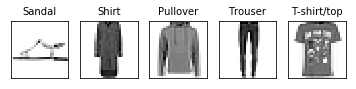

In [41]:
%matplotlib inline
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import numpy as np
import matplotlib.pyplot as plt
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    for j in range(0,9):
        if y_train[n][j]!=0:
            a=j
    ax.set_title(class_names[a], fontsize=10)
    plt.imshow(x_train[n].reshape(28,28), cmap='Greys')  